# Módulo 10 atividade 1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('previsao_renda.csv')
data = data.drop('Unnamed: 0', axis =1)
data.columns

Index(['data_ref', 'index', 'sexo', 'posse_de_veiculo', 'posse_de_imovel',
       'qtd_filhos', 'tipo_renda', 'educacao', 'estado_civil',
       'tipo_residencia', 'idade', 'tempo_emprego', 'qt_pessoas_residencia',
       'mau', 'renda'],
      dtype='object')

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [4]:
df1 = data[['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda']]

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
qtd_filhos,1.000000,-0.364303,-0.074250,0.896488,0.009567
idade,-0.364303,1.000000,0.323934,-0.338805,0.042570
tempo_emprego,-0.074250,0.323934,1.000000,-0.065748,0.394235
qt_pessoas_residencia,0.896488,-0.338805,-0.065748,1.000000,0.020977
renda,0.009567,0.042570,0.394235,0.020977,1.000000


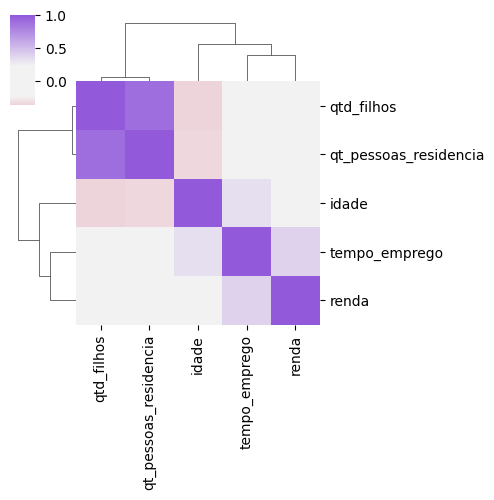

In [24]:
cmap = sns.diverging_palette(h_neg=0, h_pos=999, as_cmap=True, sep=60, center='light')
sns.clustermap((df1.corr()), figsize=(5,5), center=0, cmap=cmap), 
df1.corr()

# Vejo uma coisa mais notável.
1. É que a quantidade filhos e qtd de pessoas na residências acabam coincidindo, o que faz sentido, por pensar que os filhos continuam morando junto com as mães.

<Axes: xlabel='qt_pessoas_residencia', ylabel='qtd_filhos'>

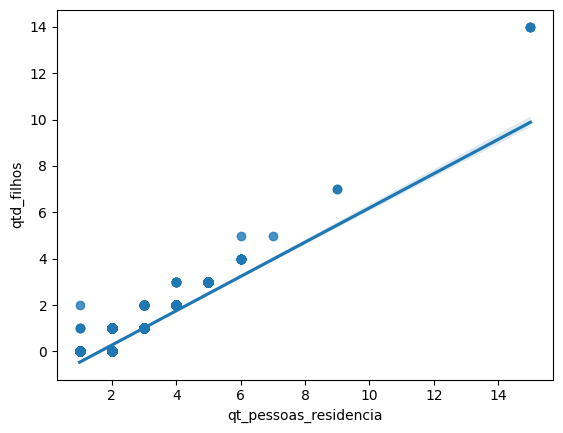

In [11]:
sns.regplot(x='qt_pessoas_residencia', y='qtd_filhos', data=df1)

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

<Axes: xlabel='tempo_emprego', ylabel='renda'>

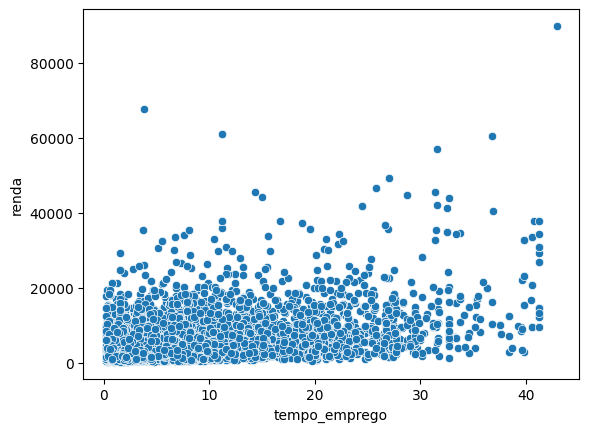

In [23]:
sns.scatterplot(x='tempo_emprego', y='renda', data=df1)

## Apenas essa é próxima.

3) Na sua aopinião, há outliers na variável renda?

In [ ]:
## Acredito que não, pois podem realmente existir esses salarios em todas as faixas.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [31]:
df1_log = df1.copy()
df1_log['log_renda'] = np.log(df1_log['renda'])
df1_log = df1_log[['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'log_renda']]

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,log_renda
qtd_filhos,1.000000,-0.364303,-0.074250,0.896488,0.023743
idade,-0.364303,1.000000,0.323934,-0.338805,0.024712
tempo_emprego,-0.074250,0.323934,1.000000,-0.065748,0.379556
qt_pessoas_residencia,0.896488,-0.338805,-0.065748,1.000000,0.036267
log_renda,0.023743,0.024712,0.379556,0.036267,1.000000


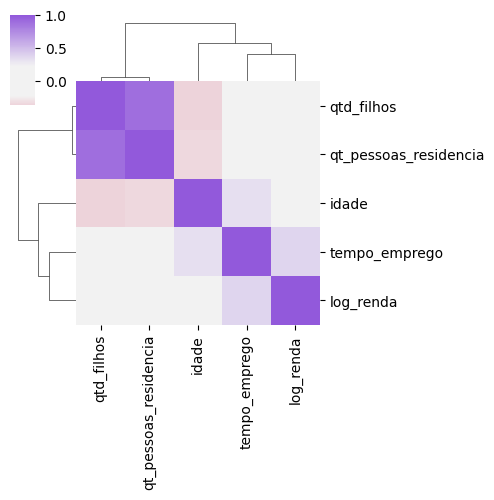

In [34]:
cmap = sns.diverging_palette(h_neg=0, h_pos=999, as_cmap=True, sep=60, center='light')
sns.clustermap((df1_log.corr()), figsize=(5,5), center=0, cmap=cmap), 
df1_log.corr()

<Axes: xlabel='tempo_emprego', ylabel='renda'>

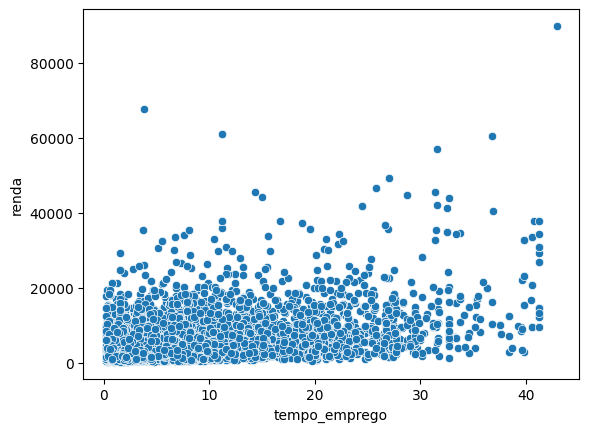

In [35]:
sns.scatterplot(x='tempo_emprego', y='renda', data=df1)


5) A aplicação do LOG você acha que melhorou ou piorou a análise?

In [ ]:
# Acredito que melhorou, mas pouquíssimo, quase inperceptível, acredito que por em alguns casos a renda ser algo que cresça de uma forma maior,
# de certa forma pode ter ajudado, porém, a análise deste caso deve ser tratada de uma forma diferente.